In [ ]:
#Gradient Boost trained with non-linear data, with data augmentation SAME for each label and using labels-v4

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import os
import time

In [2]:
# nombre de instancia
# número restricciones
# número variables
# si es lineal o no (true / false)
# porcentaje de restricciones unarias, binarias, porcentaje de ternarias, porcentaje cuaternarias o más 
# porcentaje de terminos unarios, binarios, porcentaje de ternarios, porcentaje cuaternarios o más 
# porcentaje de terminos en la función obj
# porcentaje de terminos positivos/negativos en restricciones
# porcentaje de terminos positivos/negativos en funcion obj
# timestep
# solver (label)

main_path="/global/scratch/users/cpezov/AAPBO/"
d_path=main_path+"datasets-v4/"
feat_path=d_path+"features/"

columns = ["# contraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","timestep","solver"]
names=[]
num_rest=[]
num_var=[]
linear=[]
r_unary=[]
r_binary=[]
r_ternary=[]
r_cuaternary=[]
t_unary=[]
t_binary=[]
t_ternary=[]
t_cuaternary=[]
t_fo=[]
t_pos_r=[]
t_pos_fo=[]
timestep=[]
solvers=[]

#Recolectar data de txt files
with open(d_path+"txt_files/data_ordered.txt") as f:
    lines = f.readlines()
    for l in lines:
        words=l.split()
        name=words[0][words[0].find("/")+1:]
        print(name)
        with open(feat_path+name) as feat_f:
            l=feat_f.readlines()
            w=l[0].split()
            for n in range(500): #repetir 500 cada instancia, para que cuadre con los timesteps
                names.append(w[0])
                num_rest.append(int(w[1]))
                num_var.append(int(w[2]))
                linear.append(int(w[3]))
                r_unary.append(float(w[4]))
                r_binary.append(float(w[5]))
                r_ternary.append(float(w[6]))
                r_cuaternary.append(float(w[7]))
                t_unary.append(float(w[8]))
                t_binary.append(float(w[9]))
                t_ternary.append(float(w[10]))
                t_cuaternary.append(float(w[11]))
                t_fo.append(float(w[12]))
                t_pos_r.append(float(w[13]))
                t_pos_fo.append(float(w[14]))
                timestep.append(n)
        
with open(main_path+"labels-v4.txt") as f:
    lines = f.readlines()
    for l in lines:
        for word in l.split():
            solvers.append(int(word))

Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-abcdeir.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-combined-EDCBAir.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irEDCBA.opb
Benchmark1/normalized-single-ob

Benchmark11/normalized-single-obj-f49-DC_TotalLoss.seq-A-2-1-irEDCBA.opb
Benchmark11/normalized-single-obj-f49-DC_TotalLoss.seq-A-2-combined-irEDCBA.opb
Benchmark11/normalized-single-obj-f48-DC_TotalLoss.seq-B-2-combined-irabcde.opb
Benchmark11/normalized-single-obj-f48-DC_TotalLoss.seq-B-2-combined-irEDCBA.opb
Benchmark11/normalized-single-obj-f48-DC_TotalLoss.seq-A-2-combined-irabcde.opb
Benchmark12/normalized-single-obj-f51-DC_side2.seq-B-2-2-irEDCBA.opb
Benchmark12/normalized-single-obj-f51-DC_side2.seq-A-2-2-irabcde.opb
Benchmark12/normalized-single-obj-f51-DC_side2.seq-A-2-2-irEDCBA.opb
Benchmark12/normalized-single-obj-f51-DC_side2.seq-B-2-2-irabcde.opb
Benchmark12/normalized-single-obj-f51-DC_side2.seq-B-2-1-irabcde.opb
Benchmark12/normalized-single-obj-f51-DC_side2.seq-B-2-1-irEDCBA.opb
Benchmark12/normalized-single-obj-f50-DC_side2.seq-A-2-1-irEDCBA.opb
Benchmark12/normalized-single-obj-f50-DC_side2.seq-A-2-1-irabcde.opb
Benchmark12/normalized-single-obj-f50-DC_side2.seq-A-2-

Benchmark25/normalized-hw128-vm100p-opt.opb.negationfix.opb
Benchmark26/normalized-autocorr_bern40-40.opb
Benchmark26/normalized-autocorr_bern45-23.opb
Benchmark26/normalized-autocorr_bern45-34.opb
Benchmark26/normalized-autocorr_bern45-45.opb
Benchmark26/normalized-autocorr_bern50-25.opb
Benchmark26/normalized-autocorr_bern50-38.opb
Benchmark26/normalized-autocorr_bern50-50.opb
Benchmark26/normalized-autocorr_bern55-28.opb
Benchmark26/normalized-autocorr_bern55-41.opb
Benchmark26/normalized-autocorr_bern55-55.opb
Benchmark26/normalized-autocorr_bern60-30.opb
Benchmark26/normalized-autocorr_bern60-60.opb
Benchmark26/normalized-autocorr_bern60-45.opb
Benchmark27/normalized-cardqp_inlp.opb
Benchmark28/normalized-crossdock_15x8.opb
Benchmark29/normalized-faclay60.opb
Benchmark29/normalized-faclay70.opb
Benchmark29/normalized-faclay75.opb
Benchmark29/normalized-faclay80.opb
Benchmark30/normalized-graphpart_2g-0044-1601.opb
Benchmark30/normalized-graphpart_2g-0055-0062.opb
Benchmark30/norma

Benchmark51/normalized-hw64-vm95p-opt.opb.negationfix.opb
Benchmark51/normalized-hw64-vm98p-opt.opb.negationfix.opb
Benchmark51/normalized-hw64-vm99p-opt.opb.negationfix.opb
Benchmark51/normalized-hw64-vm100p-opt.opb.negationfix.opb
Benchmark52/normalized-hw128-vm25p-opt.opb.negationfix.opb
Benchmark52/normalized-hw128-vm50p-opt.opb.negationfix.opb
Benchmark52/normalized-hw128-vm75p-opt.opb.negationfix.opb
Benchmark52/normalized-hw128-vm85p-opt.opb.negationfix.opb
Benchmark53/normalized-autocorr_bern20-03.opb
Benchmark53/normalized-autocorr_bern20-05.opb
Benchmark53/normalized-autocorr_bern20-10.opb
Benchmark53/normalized-autocorr_bern20-15.opb
Benchmark53/normalized-autocorr_bern25-03.opb
Benchmark53/normalized-autocorr_bern25-25.opb
Benchmark53/normalized-autocorr_bern25-19.opb
Benchmark53/normalized-autocorr_bern25-06.opb
Benchmark53/normalized-autocorr_bern25-13.opb
Benchmark53/normalized-autocorr_bern30-08.opb
Benchmark53/normalized-autocorr_bern30-15.opb
Benchmark53/normalized-au

Benchmark82/normalized-NG.dot_luby_0null10mast_rapportOE1.0_TMAX300_K192_cod1.opb
Benchmark83/normalized-NG.dot_luby_10null50mast_rapportOE2.0_TMAX60_K192_cod1.opb
Benchmark83/normalized-NG.dot_luby_10null10mast_rapportOE2.0_TMAX60_K192_cod1.opb
Benchmark83/normalized-NG.dot_luby_10null10mast_rapportOE2.0_TMAX15_K192_cod1.opb
Benchmark83/normalized-NG.dot_luby_10null10mast_rapportOE1.0_TMAX60_K192_cod1.opb
Benchmark84/normalized-NG.dot_luby_20null20mast_rapportOE2.0_TMAX300_K192_cod1.opb
Benchmark84/normalized-NG.dot_luby_20null20mast_rapportOE2.0_TMAX120_K192_cod1.opb
Benchmark84/normalized-NG.dot_luby_20null20mast_rapportOE1.0_TMAX300_K192_cod1.opb
Benchmark85/normalized-NG.dot_luby_50null50mast_rapportOE2.0_TMAX300_K192_cod1.opb
Benchmark85/normalized-NG.dot_luby_50null20mast_rapportOE1.0_TMAX180_K192_cod1.opb
Benchmark86/normalized-NG.dot_unif_0null50mast_rapportOE1.0_TMAX300_K192_cod1.opb
Benchmark86/normalized-NG.dot_unif_0null20mast_rapportOE2.0_TMAX120_K192_cod2.opb
Benchmark87

Benchmark110/normalized-BA_RDC4.dot_fibo_50null0mast_rapportOE1.0_TMAX120_K67_cod2.opb
Benchmark111/normalized-BA_RDC4.dot_luby_0null10mast_rapportOE1.0_TMAX120_K67_cod3.opb
Benchmark111/normalized-BA_RDC4.dot_luby_0null0mast_rapportOE2.0_TMAX120_K67_cod1.opb
Benchmark111/normalized-BA_RDC4.dot_luby_0null0mast_rapportOE1.0_TMAX15_K67_cod1.opb
Benchmark111/normalized-BA_RDC4.dot_luby_0null20mast_rapportOE2.0_TMAX300_K67_cod2.opb
Benchmark111/normalized-BA_RDC4.dot_luby_0null20mast_rapportOE2.0_TMAX120_K67_cod2.opb
Benchmark112/normalized-BA_RDC4.dot_luby_10null10mast_rapportOE2.0_TMAX60_K67_cod3.opb
Benchmark112/normalized-BA_RDC4.dot_luby_10null10mast_rapportOE2.0_TMAX15_K67_cod1.opb
Benchmark112/normalized-BA_RDC4.dot_luby_10null10mast_rapportOE2.0_TMAX120_K67_cod1.opb
Benchmark112/normalized-BA_RDC4.dot_luby_10null0mast_rapportOE2.0_TMAX60_K67_cod1.opb
Benchmark112/normalized-BA_RDC4.dot_luby_10null0mast_rapportOE1.0_TMAX60_K67_cod1.opb
Benchmark112/normalized-BA_RDC4.dot_luby_10null

Benchmark173/normalized-rand56b853.cudf.paranoid.opb
Benchmark173/normalized-rand396cf8.cudf.paranoid.opb
Benchmark173/normalized-rande22180.cudf.paranoid.opb
Benchmark173/normalized-randea4da3.cudf.paranoid.opb
Benchmark173/normalized-rand682c92.cudf.paranoid.opb
Benchmark173/normalized-randab5933.cudf.paranoid.opb
Benchmark173/normalized-rand59f7dd.cudf.paranoid.opb
Benchmark173/normalized-randa65dfb.cudf.paranoid.opb
Benchmark173/normalized-rand2fa1f8.cudf.paranoid.opb
Benchmark173/normalized-rand88811a.cudf.paranoid.opb
Benchmark173/normalized-rand49e642.cudf.paranoid.opb
Benchmark173/normalized-randdd5509.cudf.paranoid.opb
Benchmark173/normalized-rand6c4744.cudf.paranoid.opb
Benchmark174/normalized-mono-gac.cudf.trendy.opb
Benchmark174/normalized-plasma-widgets-workspace.cudf.trendy.opb
Benchmark174/normalized-kphotoalbum.cudf.trendy.opb
Benchmark174/normalized-kommander.cudf.trendy.opb
Benchmark174/normalized-kblocks.cudf.trendy.opb
Benchmark174/normalized-inetutils-syslogd.cudf.

Benchmark185/normalized-j602_4.std.opb
Benchmark185/normalized-j603_9.std.opb
Benchmark185/normalized-j605_7.std.opb
Benchmark185/normalized-j6031_6.std.opb
Benchmark185/normalized-j6019_2.std.opb
Benchmark185/normalized-j6027_6.std.opb
Benchmark185/normalized-j6029_8.std.opb
Benchmark185/normalized-j6021_5.std.opb
Benchmark185/normalized-j6020_6.std.opb
Benchmark185/normalized-j6030_8.std.opb
Benchmark185/normalized-j6026_2.std.opb
Benchmark185/normalized-j6035_5.std.opb
Benchmark185/normalized-j6043_1.std.opb
Benchmark185/normalized-j6046_1.std.opb
Benchmark185/normalized-j6039_5.std.opb
Benchmark185/normalized-j6044_1.std.opb
Benchmark186/normalized-j907_10.std.opb
Benchmark186/normalized-j901_1.std.opb
Benchmark186/normalized-j909_4.std.opb
Benchmark186/normalized-j9016_1.std.opb
Benchmark186/normalized-j902_10.std.opb
Benchmark186/normalized-j902_3.std.opb
Benchmark186/normalized-j9014_2.std.opb
Benchmark186/normalized-j9013_1.std.opb
Benchmark186/normalized-j9010_6.std.opb
Benchm

Benchmark199/normalized-fir10_trarea_ac.opb
Benchmark200/normalized-reduced-fir05_trarea_ac.opb
Benchmark200/normalized-reduced-fir03_trarea_ac.opb
Benchmark200/normalized-reduced-fir04_trarea_ac.opb
Benchmark200/normalized-reduced-fir07_trarea_ac.opb
Benchmark200/normalized-reduced-fir09_trarea_ac.opb
Benchmark200/normalized-reduced-fir06_trarea_ac.opb
Benchmark200/normalized-reduced-fir08_trarea_ac.opb
Benchmark200/normalized-reduced-fir10_trarea_ac.opb
Benchmark201/normalized-fir01_area_delay.opb
Benchmark201/normalized-fir02_area_delay.opb
Benchmark201/normalized-fir04_area_delay.opb
Benchmark201/normalized-fir05_area_delay.opb
Benchmark201/normalized-fir03_area_delay.opb
Benchmark201/normalized-fir06_area_delay.opb
Benchmark201/normalized-fir07_area_delay.opb
Benchmark201/normalized-fir09_area_delay.opb
Benchmark201/normalized-fir10_area_delay.opb
Benchmark201/normalized-fir08_area_delay.opb
Benchmark202/normalized-fir01_area_opers.opb
Benchmark202/normalized-fir02_area_opers.opb


Benchmark222/normalized-mis_100_10_5.opb
Benchmark222/normalized-mis_100_10_4.opb
Benchmark222/normalized-mis_100_10_3.opb
Benchmark222/normalized-mis_100_10_2.opb
Benchmark222/normalized-mis_100_10_1.opb
Benchmark223/normalized-mis_200_25_5.opb
Benchmark223/normalized-mis_200_25_4.opb
Benchmark223/normalized-mis_200_25_3.opb
Benchmark223/normalized-mis_200_25_2.opb
Benchmark223/normalized-mis_200_25_1.opb
Benchmark223/normalized-mis_200_10_5.opb
Benchmark223/normalized-mis_200_10_4.opb
Benchmark223/normalized-mis_200_10_3.opb
Benchmark223/normalized-mis_200_10_2.opb
Benchmark223/normalized-mis_200_10_1.opb
Benchmark224/normalized-mis_500_60_5.opb
Benchmark224/normalized-mis_500_60_4.opb
Benchmark224/normalized-mis_500_60_3.opb
Benchmark224/normalized-mis_500_60_2.opb
Benchmark224/normalized-mis_500_60_1.opb
Benchmark224/normalized-mis_500_25_5.opb
Benchmark224/normalized-mis_500_25_4.opb
Benchmark224/normalized-mis_500_25_3.opb
Benchmark224/normalized-mis_500_25_2.opb
Benchmark224/nor

Benchmark228/factor-mod-size=7-P0=73-P1=113-P2=59-P3=53-P4=29-B.opb
Benchmark228/factor-mod-size=7-P0=73-P1=127-P2=41-P3=29-P4=59-B.opb
Benchmark228/factor-mod-size=7-P0=97-P1=37-P2=107-P3=53-P4=53-B.opb
Benchmark228/factor-mod-size=7-P0=17-P1=89-P2=113-P3=89-P4=67-B.opb
Benchmark228/factor-mod-size=7-P0=59-P1=67-P2=97-P3=53-P4=41-P5=89-B.opb
Benchmark228/factor-mod-size=7-P0=53-P1=37-P2=29-P3=83-P4=23-P5=67-B.opb
Benchmark228/factor-mod-size=7-P0=107-P1=79-P2=47-P3=23-P4=59-P5=43-B.opb
Benchmark228/factor-mod-size=7-P0=5-P1=113-P2=107-P3=11-P4=43-P5=101-B.opb
Benchmark228/factor-mod-size=7-P0=11-P1=71-P2=127-P3=19-P4=89-P5=17-B.opb
Benchmark228/factor-mod-size=7-P0=43-P1=107-P2=31-P3=113-P4=127-P5=2-P6=79-B.opb
Benchmark228/factor-mod-size=7-P0=37-P1=47-P2=17-P3=127-P4=31-P5=127-P6=17-B.opb
Benchmark228/factor-mod-size=7-P0=127-P1=59-P2=127-P3=89-P4=17-P5=43-P6=53-B.opb
Benchmark228/factor-mod-size=7-P0=89-P1=37-P2=43-P3=47-P4=41-P5=107-P6=127-B.opb
Benchmark228/factor-mod-size=7-P0=1

Benchmark231/normalized-mps-v2-20-10-forplan.opb
Benchmark231/normalized-mps-v2-20-10-sctap1.opb
Benchmark231/normalized-mps-v2-20-10-etamacro.opb
Benchmark231/normalized-mps-v2-20-10-degen2.opb
Benchmark231/normalized-mps-v2-20-10-tuff.opb
Benchmark231/normalized-mps-v2-20-10-grow15.opb
Benchmark231/normalized-mps-v2-20-10-scsd1.opb
Benchmark231/normalized-mps-v2-20-10-seba.opb
Benchmark231/normalized-mps-v2-20-10-grow22.opb
Benchmark231/normalized-mps-v2-20-10-gfrd-pnc.opb
Benchmark231/normalized-mps-v2-20-10-standata.opb
Benchmark231/normalized-mps-v2-20-10-standgub.opb
Benchmark231/normalized-mps-v2-20-10-scrs8.opb
Benchmark231/normalized-mps-v2-20-10-bnl1.opb
Benchmark231/normalized-mps-v2-20-10-scsd6.opb
Benchmark231/normalized-mps-v2-20-10-maros.opb
Benchmark231/normalized-mps-v2-20-10-shell.opb
Benchmark231/normalized-mps-v2-20-10-fit1p.opb
Benchmark231/normalized-mps-v2-20-10-modszk1.opb
Benchmark231/normalized-mps-v2-20-10-degen3.opb
Benchmark231/normalized-mps-v2-20-10-sctap

Benchmark273/normalized-mps-v2-20-10-maros.opb
Benchmark274/normalized-factor-sizeN=20-sizeP=11-sizeQ=20-900543.opb
Benchmark274/normalized-factor-sizeN=20-sizeP=11-sizeQ=20-900543-max.opb
Benchmark274/normalized-factor-sizeN=20-sizeP=11-sizeQ=20-496708-max.opb
Benchmark274/normalized-factor-sizeN=20-sizeP=11-sizeQ=20-496708.opb
Benchmark275/normalized-factor-sizeN=40-sizeP=21-sizeQ=40-793490986.opb
Benchmark275/normalized-factor-sizeN=40-sizeP=21-sizeQ=40-793490986-max.opb
Benchmark275/normalized-factor-sizeN=40-sizeP=21-sizeQ=40-289612555.opb
Benchmark275/normalized-factor-sizeN=40-sizeP=21-sizeQ=40-289612555-max.opb
Benchmark276/normalized-factor-sizeN=60-sizeP=31-sizeQ=60-784051325.opb
Benchmark276/normalized-factor-sizeN=60-sizeP=31-sizeQ=60-784051325-max.opb
Benchmark276/normalized-factor-sizeN=60-sizeP=31-sizeQ=60-472296155.opb
Benchmark276/normalized-factor-sizeN=60-sizeP=31-sizeQ=60-472296155-max.opb
Benchmark277/normalized-factor-sizeN=80-sizeP=41-sizeQ=80-898154415.opb
Bench

Benchmark320/normalized-mps-v2-20-10-p0548.opb
Benchmark321/normalized-mps-v2-20-10-sentoy.opb
Benchmark322/normalized-mps-v2-20-10-stein9.opb
Benchmark322/normalized-mps-v2-20-10-stein15.opb
Benchmark322/normalized-mps-v2-20-10-stein27.opb
Benchmark322/normalized-mps-v2-20-10-stein45.opb
Benchmark323/normalized-mps-v2-20-10-mitre.opb
Benchmark324/normalized-mps-v2-20-10-opt1217.opb
Benchmark324/normalized-mps-v2-20-10-10teams.opb
Benchmark324/normalized-mps-v2-20-10-p2756.opb
Benchmark324/normalized-mps-v2-20-10-protfold.opb
Benchmark324/normalized-mps-v2-20-10-seymour.opb
Benchmark324/normalized-mps-v2-20-10-manna81.opb
Benchmark324/normalized-mps-v2-20-10-mzzv11.opb
Benchmark324/normalized-mps-v2-20-10-mzzv42z.opb
Benchmark324/normalized-mps-v2-20-10-fast0507.opb
Benchmark324/normalized-mps-v2-20-10-net12.opb
Benchmark325/normalized-mps-v2-20-10-neos5.opb
Benchmark325/normalized-mps-v2-20-10-neos16.opb
Benchmark325/normalized-mps-v2-20-10-neos1.opb
Benchmark325/normalized-mps-v2-20-

Benchmark329/normalized-reduced-mps-v2-20-10-air04.opb
Benchmark329/normalized-reduced-mps-v2-20-10-swath.opb
Benchmark329/normalized-reduced-mps-v2-20-10-modglob.opb
Benchmark329/normalized-reduced-mps-v2-20-10-roll3000.opb
Benchmark329/normalized-reduced-mps-v2-20-10-danoint.opb
Benchmark329/normalized-reduced-mps-v2-20-10-fixnet6.opb
Benchmark329/normalized-reduced-mps-v2-20-10-set1ch.opb
Benchmark329/normalized-reduced-mps-v2-20-10-gesa2-o.opb
Benchmark329/normalized-reduced-mps-v2-20-10-gesa2.opb
Benchmark329/normalized-reduced-mps-v2-20-10-tr12-30.opb
Benchmark329/normalized-reduced-mps-v2-20-10-qiu.opb
Benchmark329/normalized-reduced-mps-v2-20-10-aflow40b.opb
Benchmark329/normalized-reduced-mps-v2-20-10-msc98-ip.opb
Benchmark329/normalized-reduced-mps-v2-20-10-t1717.opb
Benchmark329/normalized-reduced-mps-v2-20-10-nw04.opb
Benchmark329/normalized-reduced-mps-v2-20-10-rd-rplusc-21.opb
Benchmark329/normalized-reduced-mps-v2-20-10-momentum3.opb
Benchmark329/normalized-reduced-mps-v

Benchmark346/normalized-ii8c1.opb
Benchmark346/normalized-ii8e1.opb
Benchmark346/normalized-ii8d1.opb
Benchmark346/normalized-ii8b2.opb
Benchmark346/normalized-ii32e3.opb
Benchmark346/normalized-ii32d2.opb
Benchmark346/normalized-ii32b3.opb
Benchmark346/normalized-ii32b4.opb
Benchmark346/normalized-ii32e4.opb
Benchmark346/normalized-ii8b3.opb
Benchmark346/normalized-ii8e2.opb
Benchmark346/normalized-ii8d2.opb
Benchmark346/normalized-ii16e2.opb
Benchmark346/normalized-ii8c2.opb
Benchmark346/normalized-ii32a1.opb
Benchmark346/normalized-ii8b4.opb
Benchmark346/normalized-ii32e5.opb
Benchmark346/normalized-ii16d2.opb
Benchmark346/normalized-ii16c2.opb
Benchmark346/normalized-ii16e1.opb
Benchmark346/normalized-ii16b2.opb
Benchmark346/normalized-ii16d1.opb
Benchmark346/normalized-ii16c1.opb
Benchmark346/normalized-ii32d3.opb
Benchmark346/normalized-ii32c4.opb
Benchmark346/normalized-ii16a1.opb
Benchmark346/normalized-ii16a2.opb
Benchmark346/normalized-ii16b1.opb
Benchmark347/normalized-jnh22

Benchmark363/normalized-ricks.r.opb
Benchmark363/normalized-fout.r.opb
Benchmark363/normalized-m200_500_10_10.r.opb
Benchmark363/normalized-rd73.b.opb
Benchmark363/normalized-C880.a.opb
Benchmark363/normalized-max512.r.opb
Benchmark363/normalized-mlp4.r.opb
Benchmark363/normalized-exps.r.opb
Benchmark363/normalized-m4.r.opb
Benchmark363/normalized-addm4.r.opb
Benchmark363/normalized-lin.rom.r.opb
Benchmark363/normalized-max1024.r.opb
Benchmark363/normalized-test1.r.opb
Benchmark363/normalized-C880.b.opb
Benchmark363/normalized-ex5.r.opb
Benchmark363/normalized-apex7.b.opb
Benchmark363/normalized-alu2.b.opb
Benchmark363/normalized-prom2.r.opb
Benchmark363/normalized-rd84.b.opb
Benchmark363/normalized-bench1.r.opb
Benchmark363/normalized-C499.a.opb
Benchmark363/normalized-saucier.r.opb
Benchmark363/normalized-duke2.b.opb
Benchmark363/normalized-bw.b.opb
Benchmark363/normalized-apex6.b.opb
Benchmark363/normalized-des.a.opb
Benchmark363/normalized-C499.b.opb
Benchmark363/normalized-pdc.r.o

Benchmark374/normalized-factor-size=9-P=149-Q=251.opb
Benchmark374/normalized-factor-size=9-P=149-Q=271.opb
Benchmark374/normalized-factor-size=9-P=149-Q=293.opb
Benchmark374/normalized-factor-size=9-P=211-Q=479.opb
Benchmark374/normalized-factor-size=9-P=149-Q=397.opb
Benchmark374/normalized-factor-size=9-P=149-Q=409.opb
Benchmark374/normalized-factor-size=9-P=149-Q=487.opb
Benchmark374/normalized-factor-size=9-P=149-Q=509.opb
Benchmark374/normalized-factor-size=9-P=151-Q=167.opb
Benchmark374/normalized-factor-size=9-P=157-Q=163.opb
Benchmark374/normalized-factor-size=9-P=157-Q=181.opb
Benchmark374/normalized-factor-size=9-P=173-Q=211.opb
Benchmark374/normalized-factor-size=9-P=157-Q=373.opb
Benchmark374/normalized-factor-size=9-P=167-Q=173.opb
Benchmark374/normalized-factor-size=9-P=167-Q=179.opb
Benchmark374/normalized-factor-size=9-P=17-Q=347.opb
Benchmark374/normalized-factor-size=9-P=17-Q=457.opb
Benchmark374/normalized-factor-size=9-P=17-Q=487.opb
Benchmark374/normalized-factor-

In [3]:
#Crear dataframe
# dataframe with no names, so that it doesn't convert everything to str 
data=np.array([num_rest,num_var,linear,r_unary,r_binary,r_ternary,r_cuaternary,t_unary,t_binary,t_ternary,t_cuaternary,t_fo,t_pos_r,t_pos_fo,timestep,solvers])
df = pd.DataFrame(data.T, columns=columns)

#print(df.head())

In [4]:
x=df[["# contraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","timestep"]]
y=df[['solver']]

#agrupar diferentes timestpes de cada instancia en un mismo set
random.seed(9) #same seed to generate same random numbers as other models
train_indx=[]
inst_train=[]
test_indx=[]
for i in range(0,3128): # v4
    r = random.randint(0,2)
    if(r==2):
        for j in range(0,500):
            test_indx.append(500*i+j)
    else:
        inst_train.append(i)
        for j in range(0,500):
            train_indx.append(500*i+j)

x_train=x.iloc[train_indx]
x_test=x.iloc[test_indx]
y_train=y.iloc[train_indx]
y_test=y.iloc[test_indx]
y_train_og=y.iloc[train_indx]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1027000, 15)
(537000, 15)
(1027000, 1)
(537000, 1)


In [5]:
#Data augmentation para training set de instancias con clases distintas a gurobi (5)

indx_dis=[] #indexes of instances with disadvantaged labels 

#identificar instancias que tengan clase distinta a gurobi
for i in inst_train:
    has_dis=False
    for j in range(500):
        ind=500*i+j
        if(solvers[ind]!=5):
            has_dis=True
            break
    if(has_dis):
        for j in range(500):
            indx_dis.append(500*i+j)

print(len(indx_dis))
print(len(train_indx), end="\n\n")            

#agregar las instancias al final de x_train e y_train
x_train_dis=x.iloc[indx_dis]
y_train_dis=y.iloc[indx_dis]

x_train=x_train.append(x_train_dis)
y_train=y_train.append(y_train_dis)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

674500
1027000

(1701500, 15)
(537000, 15)
(1701500, 1)
(537000, 1)


In [6]:
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=3, max_features="sqrt", random_state=0)
gbc_model.fit(np.nan_to_num(x_train.astype(np.float32)), y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
y_pred = gbc_model.predict(np.nan_to_num(x_test.astype(np.float32)))

In [8]:
print("Accuracy",metrics.accuracy_score(y_test.values.ravel(), y_pred))
pred = gbc_model.predict_proba(np.nan_to_num(x_test.astype(np.float32)))
print("Loss",metrics.log_loss(y_test.values.ravel(), pred))

Accuracy 0.7046871508379888
Loss 0.8172553788129521


In [9]:
#Save
l=int(len(y_test)/500)
y_test_np=y_test.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/gradientBoost_nonlinear-v4/results/y_test.txt", "w")
np.savetxt(f,y_test_np.reshape(y_test_np.shape[0], -1),fmt="%s")
f.close()

l=int(len(y_pred)/500)
y_pred_np=y_pred.reshape(l,500)
f = open(main_path+"models/v4/gradientBoost_nonlinear-v4/results/y_preds.txt", "w")
np.savetxt(f,y_pred_np.reshape(y_pred_np.shape[0],-1),fmt='%s')
f.close()

#print(y_train_np.shape)
#print(y_pred_np)

In [10]:
l=int(len(y_train)/500)
y_train_np=y_train.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/gradientBoost_nonlinear-v4/results/y_train.txt", "w")
np.savetxt(f,y_train_np.reshape(y_train_np.shape[0], -1),fmt="%s")
f.close()

l=int(len(y_train_og)/500)
y_train_og_np=y_train_og.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/gradientBoost_nonlinear-v4/results/y_train_og.txt", "w")
np.savetxt(f,y_train_og_np.reshape(y_train_og_np.shape[0], -1),fmt="%s")
f.close()

In [11]:
#Feature importances
importances = gbc_model.feature_importances_
feats = x.columns

f=open(main_path+"models/v4/gradientBoost_nonlinear-v4/results/features_and_acc.txt", "w")

i=0
while i < len(feats):
    print("Importance of feature "+feats[i]+" is "+str(importances[i]))
    f.write("Importance of feature "+feats[i]+" is "+str(importances[i]))
    i = i+1

print(metrics.accuracy_score(y_test.values.ravel(), y_pred))
f.write("Testing accuracy: "+str(metrics.accuracy_score(y_test.values.ravel(), y_pred)))

f.close()

Importance of feature # contraints is 0.095384897658716
Importance of feature # variables is 0.08809866624051851
Importance of feature linearity is 0.014402929307319434
Importance of feature % 1 term constr is 0.0636846232691381
Importance of feature % 2 terms constr is 0.07377301675807599
Importance of feature % 3 terms constr is 0.0675771321588039
Importance of feature % 4+ terms constr is 0.11002330467819821
Importance of feature % degree 1 terms is 0.10763005866290899
Importance of feature % degree 2 terms is 0.05966312858087085
Importance of feature % degree 3 terms is 0.0008506275754586853
Importance of feature % degree 4+ terms is 0.004164990485684258
Importance of feature % terms in obj func is 0.12050241387956678
Importance of feature % positive in constr is 0.08945295422709003
Importance of feature % positive in obj func is 0.06927263132625001
Importance of feature timestep is 0.03551862519140039
0.7046871508379888


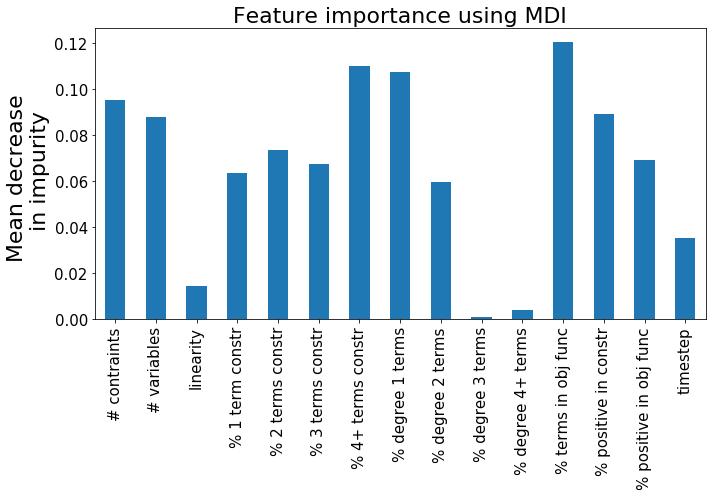

In [13]:
#Grafico feature importances
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

forest_importances = pd.Series(importances, index=feats)

fsize = 22

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, figsize = (10,7), fontsize=fsize-7)
plt.xticks(rotation=90, fontsize=fsize-7)
ax.set_title("Feature importance using MDI", fontsize=fsize)
ax.set_ylabel("Mean decrease \n in impurity", fontsize=fsize)
fig.tight_layout()

#print(importances)

# Prediction Time

In [9]:
#Calcular tiempos de predicción por cada par instancia-tiempo de test
#(Correr esto se demora)

l=int(len(y_pred)/500)
t_preds=np.empty(l*500)
i=0

#prediccion
for idx in test_indx:
    #crear dataframe de solo esa instancia-timestep
    x_i = x.iloc[[idx]]
    
    #hacer predicción y medir tiempo
    start=time.time()
    y_i = gbc_model.predict(np.nan_to_num(x_i.astype(np.float32)))
    tiempo=time.time()-start
    t_preds[i]=tiempo
    
    i=i+1

In [10]:
#Guardar tiempos de prediccion

print(t_preds)
f = open(main_path+"models/results-v4/pred_times/t_pred_gradientBoost_nonlinear-v4.txt", "w")
np.savetxt(f, t_preds, delimiter=" ", fmt="%s")
f.close()

[0.0025034  0.00120926 0.00116968 ... 0.00079679 0.00080156 0.00080347]


https://www.tutorialspoint.com/scikit_learn/scikit_learn_boosting_methods.htm#

https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

https://towardsdatascience.com/gradient-boosting-classification-explained-through-python-60cc980eeb3d